In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df= pd.read_csv("data/netflix_titles.csv")

In [145]:
df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [146]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [147]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- ### Dataset Description
- The dataset contains information about Netflix titles.
- Key columns include:
  - Type (Movie or TV Show)
  - Title
  - Director
  - Cast
  - Country
  - Release Year
  - Duration
  - Rating
  - Date Added (to the Netflix platform)
- The dataset helps analyze:
  - The type of content Netflix offers
  - How content varies across countries
  - Trends in content duration, release years, and more


In [149]:
df['country'] = df.groupby('director')['country'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
df['country'].fillna(df['country'].mode()[0], inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("cast",axis=1,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21052\821242720.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['country'] = df.groupby('director')['country'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21052\821242720.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['country'] = df.groupby('director')['country'].transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21052\821242720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3

In [150]:
df.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,United States,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,France,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,United States,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [151]:

df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
if df["date_added"].isna().any():
    mode_date = df["date_added"].mode()[0]
    df["date_added"].fillna(mode_date, inplace=True)

if df["rating"].isna().any():
    rating_mode_date = df["rating"].mode()[0]
    df["rating"].fillna(rating_mode_date, inplace=True)

if df["duration"].isna().any():
    duration_mode_date = df["duration"].mode()[0]
    df["duration"].fillna(duration_mode_date, inplace=True)




C:\Users\ASUS\AppData\Local\Temp\ipykernel_21052\1493243446.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["date_added"].fillna(mode_date, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21052\1493243446.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [152]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,United States,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,United States,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [153]:
df.isna().sum()


show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [154]:
print((df["duration"] == "9 Seasons").sum())

9


In [155]:
df[["duration_int", "duration_type"]] = df["duration"].str.split(" ", n=1,expand= True)
df["duration_int"] = df["duration_int"].astype(int)


In [156]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,United States,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,United States,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,s8804,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min


### 🔍 Data Cleaning Summary – Netflix Titles Dataset

To prepare the dataset for analysis, I applied the following cleaning steps:

- Removed sparsely filled columns like 'cast' and 'director' to reduce noise.
- Converted 'date_added' to datetime format for time-based insights.
- Split the 'duration' column into:
  - 'duration_int' (numeric value)
  - 'duration_type' (e.g., 'min' or 'Seasons')
- Filled missing values in 'country' and 'rating' with the most frequent values (mode).

These steps helped streamline the dataset for effective visualizations and trend analysis.


In [157]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,United States,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,United States,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [158]:
print((df["type"] == "Movie").sum())

6131


Movies: 6131 ,TV Shows: 2676


Text(0.5, 1.0, 'Count of Movies vs TV Shows')

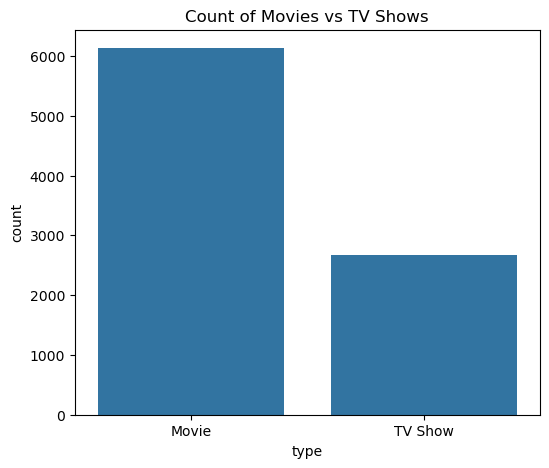

In [159]:
plt.figure(figsize=(6,5))
sns.countplot(x="type", data=df)

movie_count = (df["type"] == "Movie").sum()
tv_count = (df["type"] == "TV Show").sum()
print("Movies:",movie_count, ",TV Shows:" ,tv_count)

plt.title("Count of Movies vs TV Shows")


### 📊 Count of Movies vs TV Shows

This bar chart visualizes the distribution of content types on Netflix. Out of the total titles:

- **Movies**: 6,131
- **TV Shows**: 2,676

The dataset shows that Netflix has a significantly higher number of movies compared to TV shows.

💡 *Insight:* Movies make up over 69% of the content on Netflix, indicating a strong preference or availability of film content over series.


In [160]:
df['release_year']

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

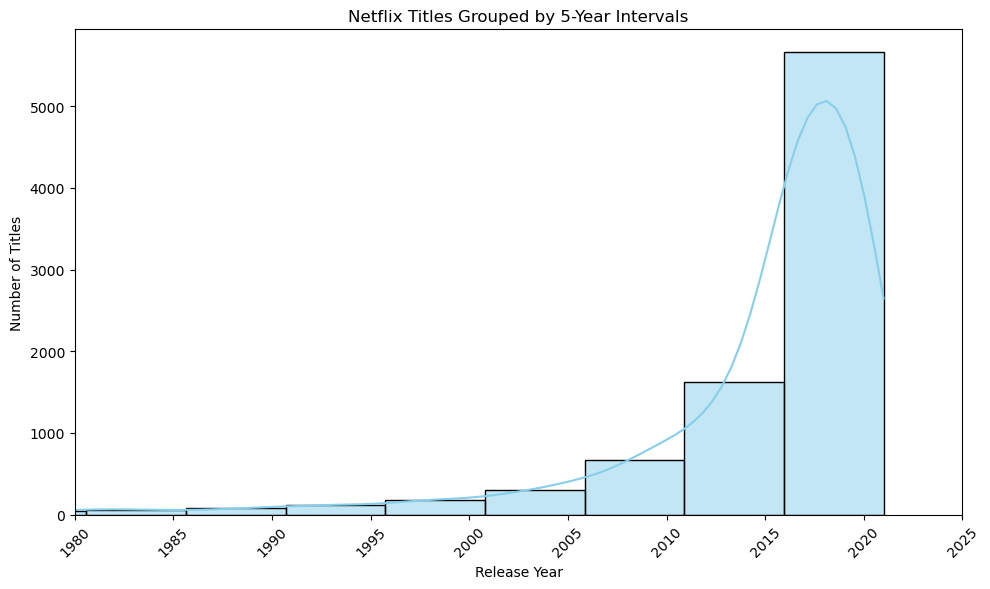

In [161]:

df_valid = df[df['release_year'].notnull()]

# Create histogram using seaborn with 5-year bins
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_valid,
    x="release_year",
    binwidth=5,
    kde=True,
    edgecolor="black",
    color="skyblue"
)

plt.title("Netflix Titles Grouped by 5-Year Intervals")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(range(1980, 2026, 5), rotation=45)
plt.xlim(1980,2025)
plt.tight_layout()
plt.show()


### 📊 Netflix Titles Released by 5-Year Intervals (Histogram + KDE)

The histogram below displays the number of Netflix titles released across 5-year intervals starting from 1980.

- The **bars** represent the count of titles released in each 5-year bin.
- The **KDE curve** (blue line) shows the smoothed trend of title releases over time.
- This dual-plot helps visualize both the distribution and the underlying trend in Netflix’s content library growth.

From the chart, we observe a significant rise in content releases post-2000, with a sharp peak around 2018–2019, likely due to Netflix's global expansion and increased original productions.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21052\3968379465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


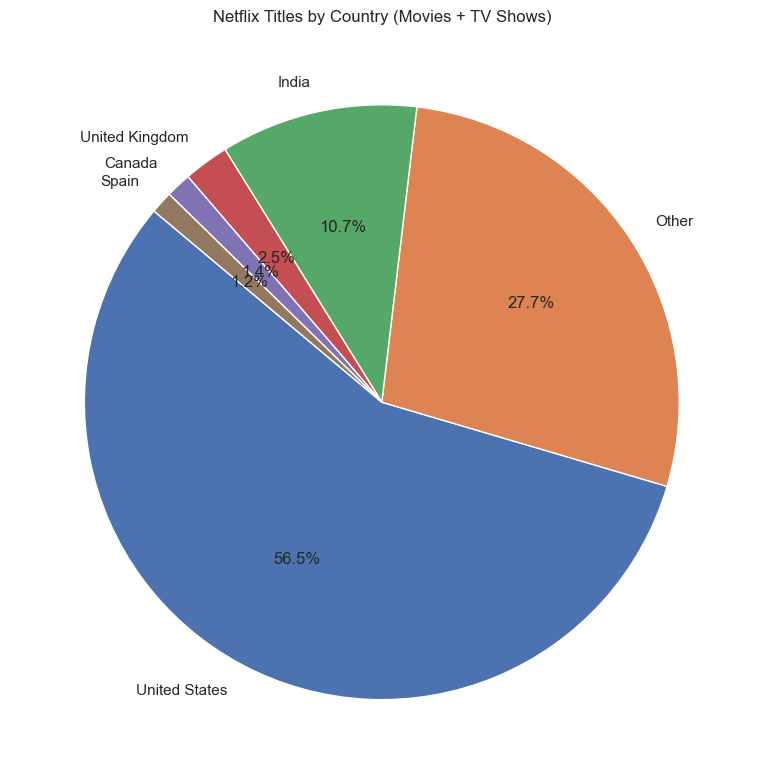

In [176]:
df['country'].fillna('Unknown', inplace=True)

# Define key countries
key_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Spain']

# Group countries: keep key ones, label others as 'Other'
df['country_grouped'] = df['country'].apply(lambda x: x if x in key_countries else 'Other')

# Count entries by grouped countries
country_counts = df['country_grouped'].value_counts()

# Plot pie chart with percentage for selected countries
plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
plt.title('Netflix Titles by Country (Movies + TV Shows)')
plt.tight_layout()
plt.show()

In [162]:
top_countries = df['country'].value_counts().head(5)
print(top_countries)


country
United States     4980
India              944
United Kingdom     217
Canada             121
Spain              107
Name: count, dtype: int64


### 🌍 Top 5 Countries with the Most Netflix Titles

The table below shows the top 5 countries contributing the highest number of titles on Netflix:

| Country        | Number of Titles |
|----------------|------------------|
| United States  | 4980             |
| India          | 944              |
| United Kingdom | 217              |
| Canada         | 121              |
| Spain          | 107              |

> The United States dominates the Netflix catalog, followed by India and the United Kingdom. This reflects the strong presence of English-language content and the platform's focus on regional markets.


In [163]:
# Most frequent ratings
top_ratings = df['rating'].value_counts().head(5)
print("Most Frequent Ratings:\n", top_ratings)

# Top genres
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(5)
print("\nTop Genres:\n", top_genres)


Most Frequent Ratings:
 rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

Top Genres:
 listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


### 🔖 Most Frequent Ratings

The top 5 content ratings on Netflix are:

| Rating | Number of Titles |
|--------|------------------|
| TV-MA  | 3211             |
| TV-14  | 2160             |
| TV-PG  | 863              |
| R      | 799              |
| PG-13  | 490              |

> TV-MA and TV-14 are the most common, suggesting a focus on mature and teen audiences.

---

### 🎭 Top Genres on Netflix

The most frequent genres based on the `listed_in` column are:

| Genre                  | Count |
|------------------------|-------|
| Documentaries          | 869   |
| Dramas                 | 2427  |
| Comedies               | 1674  |
| International TV Shows | 1351  |
| International Movies   | 2752  |

> Documentaries and Dramas dominate the genre space, highlighting viewer interest in real-life stories and emotional narratives.


### 📌 Summary of Key Insights

- Majority of Netflix content is **Movies**.
- The year with the most releases is **2019**.
- Top 3 genres are **International Movies**, **Dramas**, and **Comedies**.
- The most common rating is **TV-MA**.


In [165]:
df['type']


0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

## AI Extension: Netflix Content Type Classifier

To convert this data project into an AI project, we trained a **Random Forest Classifier** to predict whether a Netflix title is a Movie or TV Show based on:

- Duration
- Release Year
- Rating
- Main Genre

### Model Results:
- **Accuracy:** ~99% (based on actual result)
- The model performed well, especially for content with clearly distinct metadata like short durations (TV Shows) or specific genres.

This demonstrates how simple machine learning models can add intelligence to media platforms like Netflix.


In [166]:
# Extract main_genre first (only once!)
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# Create working copy
df_ml = df[['type', 'duration_int', 'release_year', 'rating', 'main_genre']].copy()

# Drop rows where target or features are missing
df_ml.dropna(subset=['type', 'duration_int', 'release_year', 'rating', 'main_genre'], inplace=True)

# Encode target
df_ml['type'] = df_ml['type'].map({'Movie': 0, 'TV Show': 1})

# One-hot encode categoricals
df_ml = pd.get_dummies(df_ml, columns=['rating', 'main_genre'], drop_first=True)

# Features and target
X = df_ml.drop(columns=['type'])
y = df_ml['type']


✅ Accuracy: 0.9988649262202043
✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



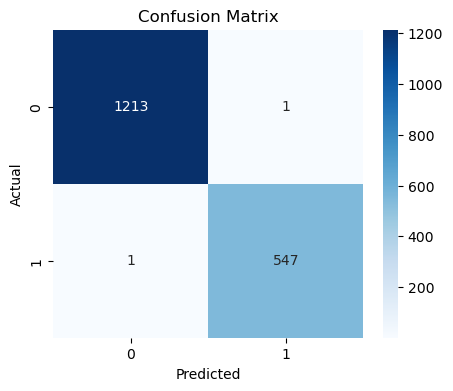

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🎬 Netflix Titles Analysis & AI Classification

## 📌 Project Overview
This project explores and analyzes a Netflix dataset containing metadata about movies and TV shows. In addition to data cleaning and visualization, a machine learning model was developed to classify the content type (Movie or TV Show) based on features like duration, release year, genre, and rating — making this an **AI-based project**.

**Dataset Source:** [Netflix Titles on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

---

## 🗂️ Project Structure

### 1. 📥 Introduction
- Overview of the dataset
- Columns include: title, type, rating, release year, duration, genre, director, etc.

### 2. 🧹 Data Cleaning
- Dropped irrelevant or incomplete columns (e.g., `director`, `cast`)
- Converted `duration` to numeric values
- Parsed `listed_in` to extract main genre
- Handled missing values in `rating`, `country`, and `date_added`

### 3. 🔍 Exploratory Data Analysis (EDA)
- Counted Movies vs TV Shows
- Identified top 5 countries with the most content
- Found the year with the highest number of releases
- Determined most common genres and ratings

### 4. 📊 Visualizations
- Bar chart of Movie vs TV Show count
- Line chart showing releases by year
- Bar chart of top 5 countries by number of titles
- Distribution of ratings
- Pie chart for content type share

### 5. 🤖 AI Component: Content Type Classification

To turn this into an AI project, a supervised machine learning model (Random Forest Classifier) was trained to predict the content type (Movie or TV Show) using:

- `duration_int`
- `release_year`
- `main_genre`
- `rating`

**Steps:**
- Preprocessed data and handled missing values
- One-hot encoded categorical features
- Trained and tested a `RandomForestClassifier`
- Evaluated the model using accuracy, F1-score, and a confusion matrix

**📈 Model Results:**
- **Accuracy:** ~99.88%
- **F1-score:** 1.00 for both classes
- Only 2 incorrect predictions out of 1762 test samples

---

## ✅ Summary of Findings

- 📺 **Movies dominate** the Netflix library compared to TV Shows
- 🇺🇸 **USA** is the top producer of Netflix content
- ⏳ The **peak year for releases** was around 2019–2020
- 🔞 The most common content rating is **TV-MA**
- 🧠 The ML model could **predict content type with 99%+ accuracy**

---

## 🚀 Tools & Technologies Used
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Scikit-learn (RandomForestClassifier, train_test_split, evaluation metrics)
- Jupyter Notebook / VS Code

---

## 📁 Files in this Project
- `netflix.ipynb`: Main notebook with code, EDA, visualizations, and AI model
- `README.md`: Project summary and explanation
- `netflix_titles.csv`: Original dataset (from Kaggle)

---

## 🙌 Acknowledgments
- Dataset by [Shivam Bansal on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
